# Classification and Representation

## Classification
* Examples
    * Email: Spam / Not Spam
    * Transaction Fraud: Yes / No
* Usually applying linear regression to a classification problem will not provide good results

### Binary Classification Problem
$y = {0, 1}$
* 0 ~ Negative Class, generally conveys the abscense of something
* 1 ~ Positive Class
* Linear regression returns a value not bounded by 0 and 1.  Logistic Regression is used instead for classification problems.



## Hypothesis Representation
* The Hypothesis representation of Logistic Regression.
* Sigmoid and Logistic function labels are interchangable
* This model is bounded by 0 and 1
* Interpretation: the result of $h_\theta(X)$ is the probability the result is 1.  More formally $h_\theta(x) = P(y=1|x;\theta)$
* Since $y = 0;1$, $P(y=0|x;\theta) = 1 - P(y=1|x;\theta)$

$ 0 \leq h_\theta(x) \leq 1 $

Use: $h_\theta(x) = g(\theta^T x)$, where $g(z) = \frac{1}{1 + e^{-z}}$

This leads to: $h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$

## Decision Boundary
* Understand better what the hypothesis function looks like
* Suppose: predect $y=1$ if $h_\theta(x) \geq 0.5$ and $y=0$ for $h_\theta(x) < 0.5$.
    * then $g(z) \geq 0.5$ when $z \geq 0$
    * leads to $y=1$ when $\theta^T x \geq 0$ and $y=0$ when $\theta^T x < 0$
* The 'decision boundary' separates the $y=0$ and $y=1$ values.
* The decision boundary is a property of the hypothesis and not the data set.
* The decision boundary does not need to be linear.  This can be accomplished by adding higher order features.  For example: $h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)$


# Logistic Regression Model
The same cost function can not be used from the Linear regression model.

## Cost Function

$\begin{align*}
& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \\
& \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \\ 
& \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}
\end{align*}$

If $y=1$ the cost goes to $0$ as $h_\theta(x)$ approaches $1$ and if $y=0$ the cost goes to $\inf$ as $h_\theta(x)$ approaches $1$. 

$\begin{align*}
& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline 
& \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline 
& \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline 
\end{align*}$

Note that writing the cost function in this way guarantees that $J(\theta)$ is convex for logistic regression.

## Simplified Cost Function
* A slightly simpler way to write the cost function
    * Compresses the two lines where $y = 1,0$ into one
    * $\mathrm{Cost}(h_\theta(x),y) = - y \; \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x))$
* Using the gradient descent to fit the parameters of logic regression

Entire cost function, derived from statistics using the principle of maximum likelyhood estimation.

$J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))]$

* need to find parameters of $\theta$ that minimize the cost function $J(\theta)$
* Minimizing the cost function using Gradient Descent

$\begin{align*}& Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\theta) \newline & \rbrace\end{align*}$

Working out the derivative:

$\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}$

This algorithm is identical to the one from linear regression.  The different is the hypothesis function.  In linear regression $h_{\theta}(x) = \theta^T x$ while here the hypothesis $h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}$ 

### Vecotrized implementation

$\begin{align*} & h = g(X\theta)\newline & J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \end{align*}$

$\theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y})$

## Advanced Optimization
* Get logistic regression to run much faster than is possible with gradient descent
* Different approaches to optimizing the cost function
    * Conjugate gradient, BFGD, L-BFGS
    * No need to pick $\alpha$ but more complex and difficult to debug
    * Recommends using the octave library to implement these
    
Example

$J(\theta) = (\theta_1-5)^2 + (\theta_2 - 5)^2$

$\frac{\partial}{\partial \theta_1} J(\theta) = 2(\theta_1 - 5)$
$\frac{\partial}{\partial \theta_2} J(\theta) = 2(\theta_2 - 5)$


Octave Code:

    ''''
    
    function [jVal, gradient] = costFunction(theta)

        jVal = [...code to compute J(theta)...];
        # jVal = (theta(1) - 5)^2 + (theta(2) - 5)^2;

        gradient = [...code to compute derivative of J(theta)...];
        # gradient = zeros(2,1)
        # gradient(1) = 2*(theta(1) - 5);
        # gradient(2) = @*(theta(2) - 5);

    end

    ''''

    ''''

    options = optimset('GradObj', 'on', 'MaxIter', 100);

    initialTheta = zeros(2,1);

         [optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta,
         options);

    ''''

* @costFunction is a pointer to the costFunction
* exit flag of 1 detaisl the convergence




# Multiclass Classification
* Examples: email foldering/tagging (work, friends, family, hobby), medical diagrams (not ill, cold, flu), weather (sunny, cloudy, rain, snow)
* y takes on a small number of discrete values

## One-vs-All

* aka 'one vs rest'
* seperates the data set into binary classification problems of the class to solve for vs the rest of the set.
* trains a logistic regression classifier $h_\theta(x)$ for each class to predict the probability that $y=i$.  
* $y$ for a new value $x$ is predicted to be the value $i$ where $h_\theta^{(i)} (x)$ is a maximum

$\begin{align*}& y \in \lbrace0, 1 ... n\rbrace \newline& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta) \newline& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta) \newline& \cdots \newline& h_\theta^{(n)}(x) = P(y = n | x ; \theta) \newline& \mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )\newline\end{align*}$

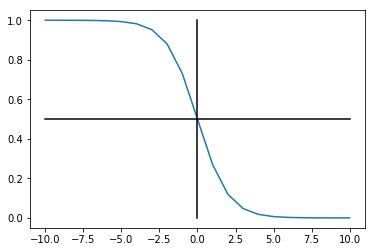

In [25]:
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = sp.arange(-10,11,1)
plt.plot(x, 1/(1+sp.exp(x)))
plt.plot([-10, 10], [0.5, 0.5], 'k')
plt.plot([0, 0], [0, 1], 'k')

# Solving the Problem of Overfitting
* Overfitting can cause algorithms to perform very poorly
* Regularization should allow us ot reduce this problem

## The Problem
* Underfitting occurs when a line through the data does not correlate well with the results.  This leads to a "high bias"
* The other end of the extreme occurs when your number of $\theta$s approaches the number of results.  This leads to a result that fits closely the existing data, but would poorly predict new results.  This leads to "high varience".
* Addressing overfitting: 
    1. Manually select which features to keep, model selection algorithm
    2. Regularization: keep all the features but reduce the magnitude/values of parameters $\theta_j$.  Works well when we have lots fo features, each of which contributes to predicting $y$.
    
## Cost Function

Example of penalizing $\theta_3$ and $\theta_4$.

$min_\theta\ \dfrac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + 1000\cdot\theta_3^2 + 1000\cdot\theta_4^2$

Modify the cost function to add regularization term to shrink all of the parameters

$min_\theta\ \dfrac{1}{2m}\  \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\ \sum_{j=1}^n \theta_j^2$.

$\lambda$ is the *regularization parameter*.  It determines how much the $\theta$ parameters are inflated.  A large $\lambda$ will smooth out the function and cause underfitter.  A $\lambda = 0$ would eliminate the regularization parameter and could lead to overfitting.

## Regularized Linear Regression
Normalizing the learning algorithms gradient descent and the normal equation for the case of regularized linear regression.

### Linear Descent

$\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}$

The case for $\theta_0$ written seperately to not penalize $\theta_0$.

Can be re-written as

$\theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

The term $1 - \alpha \frac{\lambda}{m}$ is always less then $1$.  

### Normal Equation

$\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}$

The formula for $\theta$ above minmizes the cost function.

'
    Recall that if m < n, then XTX is non-invertible. However, when we add the term λ⋅L, then XTX + λ⋅L becomes invertible. Assumes $\lambda > 0$.
'

## Regularized Logistic Regression

Adapt both gradient descent and the more advanced optimiztation techniques in order to have them work for regularized logistic regression.

Add the $\lambda$ term at the end to apply regularization to logistic regression.

$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$

The second summation is meant to exclude $\theta_0$.

The gradient descent equation has the same form with the $\lambda$ term added at the end.  The hypothesis term however is different as we saw previously.

### Using Octave

''''

    function [jVal, gradient] = costFunction(theta)
        jVal = [code to compute J(theta)];
        
        gradient(1) = [code to compute partial/partial_theta_0 J(theta)];
        gradient(2) = [code to compute partial/partial_theta_2 J(theta)];
        
        gradient(n+1) = [code to compute partial/partial_theta_n J(theta)];

''''

Calculating the gradient on $\theta_1$ to $\theta_n$ requires the $\lambda$ term.